# **🏨 Investigate Hotel Business Using Data Visualization 🏨**
**✅ Created By Muhammad Rayhan Azzindani ✅**

## **📍 Table of Content 📍**
- Business Understanding
    - Problem Statement
    - Goals
    - Objectives
- Import Libraries
- Data Preparation
    - Import Dataset
    - Data Description 
    - Basic Dataset Information
- Data Preprocessing/Cleansing
    - Handling Duplicate Rows
    - Handling Missing Values
    - Data Types Information
    - Handling Invalid Values
    - Drop Unnecessary Data
    - Division by Type of Data
- Statistical Summary 
    - Numerical + Date Features
    - Categorical Features
- Business Insights
    - Monthly Hotel Booking Analysis Based on Hotel Type
    - Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates
    - Impact Analysis of Lead Time on Hotel Bookings Cancellation Rates
    - Summary

## **⚙ Work Environment ⚙**

- **Tools**

[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17E33B7lFTE0XdArInjK481Mc-sGvWcUh?usp=sharing)

- **Programming Language**

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

- **Git and Github**

Repository : [Investigate Hotel Business Using Data Visualization](https://github.com/mrayhanazz/Investigate-Hotel-Business-Using-Data-Visualization.git)

- **Libraries**

[Requirements Text](https://github.com/mrayhanazz/Investigate-Hotel-Business-Using-Data-Visualization/blob/main/requirements.txt)

- **Dataset**

[Hotel Bookings Data](https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/mini-projects/6-investigate-hotel-business-using-data-visualization/hotel_bookings_data.csv)

## **⛳ Business Understanding ⛳**

### **📌 Problem Statement**

Innovation management and customer orientation have been widely recognized as key factors in enhancing the business performance of hotels. Hotels that track and respond to customers’ needs and preferences perform at higher levels while achieving sustained success and maintaining a strong competitive position. 

In the hospitality business, the more customers who order, the more income to the company. Revenue management  definition  was  adapted  to  “making  the  right room available  for the right  guest and the right  price at  the right  time  via the  right  distribution  channel”.  Since  hotels  have  a  fixed  inventory  and  sell  a  perishable “product”, as a way to make the right room available to the right  guest,  at  the  right  time,  hotels  accept  bookings  in advance. Therefore, analyzing the behavior of customers in booking hotels is very important.

The purpose of this project is analyzing customer behaviors in hotel business. Provide insights related to hotel business performance. This insight can be searched by data exploration, such as analyzing how customers behave in ordering hotel tickets or looking for factors that influence cancellation of hotel ticket bookings. Then present the insights using visualization and data story telling.

### **📌 Goals**

The company wants to improve the performance of the hotel business by analyzing how customers behave in ordering hotel tickets or looking for factors that influence cancellation of hotel ticket bookings.


### **📌 Objectives**

Business insight reports to provide hotel business performance by using visualization and data storytelling.

## **💉 Import Libraries 💉**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

# **📂 Data Preparation 📂**
## **📚 Import Dataset 📚**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
source = 'dataset/hotel_bookings_data.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,NaN,0,Personal,75,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,NaN,0,Personal,98,0,1,Check-Out


## **🕹 Data Description 🕹**


**Hotel Booking Dataset ([link datasets](https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/mini-projects/6-investigate-hotel-business-using-data-visualization/hotel_bookings_data.csv))**

**Dataset Description:**
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

This dataset contains `119,390 samples`. Containts `29 features` : 
- `hotel` - Hotel (H1 = Resort Hotel or H2 = City Hotel).
- `is_canceled` - Value indicating if the booking was canceled (1) or not (0).
- `lead_time` - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- `arrival_date_year` - Year of arrival date.
- `arrival_date_month` - Month of arrival date 
- `arrival_date_week_number` - Week number of year for arrival date
- `arrival_date_day_of_month` - Day of arrival date
- `stays_in_weekend_nights` - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `stays_in_weekdays_nights` - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `adults` - Number of adults
- `children` - Number of children
- `babies` - Number of babies
- `meal` - Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - Undefined/SC – no meal package 
    - BB – Bed & Breakfast
    - HB – Half board (breakfast and one other meal – usually dinner)
    - FB – Full board (breakfast, lunch and dinner)
- `city` - city name
- `market_segment` - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `distribution_channel` - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `is_repeated_guest` - Value indicating if the booking name was from a repeated guest (1) or not (0)
- `previous_cancellations` - Number of previous bookings that were cancelled by the customer prior to the current booking
- `previous_bookings_not_canceled` - Number of previous bookings not cancelled by the customer prior to the current booking
- `booking_changes` - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- `deposit_type` - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    - No Deposit – no deposit was made
    - Non Refund – a deposit was made in the value of the total stay cost
    - Refundable – a deposit was made with a value under the total cost of stay.
- `agent` - ID of the travel agency that made the booking
- `company` - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- `days_in_waiting_list` - Number of days the booking was in the waiting list before it was confirmed to the customer
- `customer_type` - Type of booking, assuming one of four categories: 
    - Contract - when the booking has an allotment or other type of contract associated to it
    - Group – when the booking is associated to a group
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
- `adr` - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `required_car_parking_spaces` - Number of car parking spaces required by the customer
- `total_of_special_requests` - Number of special requests made by the customer (e.g. twin bed or high floor)
- `reservation_status`- Reservation last status, assuming one of three categories: 
    - Canceled – booking was canceled by the customer
    - Check-Out – customer has checked in but already departed
    - No-Show – customer did not check-in and did inform the hotel of the reason why

Resources : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## **📚 Basic Dataset Information 📚**

In [3]:
print('Shape of data :', df.shape)
print('Number of rows :', df.shape[0])
print('Number of columns :', df.shape[1])    

Shape of data : (119390, 29)
Number of rows : 119390
Number of columns : 29


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Dataset Observation :**    
- The dataset contains `29 columns` and `119,390 rows` of data.
- There are 3 types of data `int64, object, float64`.
- There are some `missing values` in the following columns :
    - `company` with a total of `94% null values`, amounting to `112,593 rows`.
    - `agent` with a total of `13% null values`, amounting to `16,340 rows`.
    - `city` with a total of `0,4% null values`, amounting to `488 rows`.
    - `children` with a total of `0.003% null values`, amounting to `4 rows`.

# **📛 Data Preprocessing/Cleansing 📛**

## **📌 Handling Duplicate Rows**

In [6]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78101,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,NaN,NaN,0,Family,145,0,0,Check-Out
78104,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,NaN,NaN,0,Family,145,0,0,Check-Out
78105,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,NaN,NaN,0,Family,145,0,0,Check-Out
78403,City Hotel,0,0,2017,December,41,6,0,3,1,0,0,Breakfast,Kabupaten Blora,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,130,0,0,Check-Out
78407,City Hotel,0,0,2017,December,41,6,0,3,1,0,0,Breakfast,Kabupaten Blora,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,130,0,0,Check-Out
78385,City Hotel,0,0,2017,December,41,7,0,2,1,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,119,0,0,Check-Out
78401,City Hotel,0,0,2017,December,41,7,0,2,1,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,119,0,0,Check-Out
78404,City Hotel,0,0,2017,December,41,7,0,2,1,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,119,0,0,Check-Out
78402,City Hotel,0,0,2017,December,41,7,0,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,138,0,0,Check-Out
78405,City Hotel,0,0,2017,December,41,7,0,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,138,0,0,Check-Out


In [7]:
print('Number of duplicate rows :', df.duplicated().sum())

Number of duplicate rows : 33261


In [8]:
print(f'Dataset Dimension Before Duplicate Removal: {df.shape}')
df = df.drop_duplicates().reset_index(drop=True)
print(f'Dataset Dimension After Duplicate Removal: {df.shape}')

Dataset Dimension Before Duplicate Removal: (119390, 29)
Dataset Dimension After Duplicate Removal: (86129, 29)


## **📌 Handling Missing Values**

Check for the number of Missing Values and Percentage.

In [9]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [10]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc['Data Type'] = [df[col].dtype for col in df.columns]
nvc.sort_values(by = ['Total Null Values', 'Percentage'], ascending = False, inplace = True)
print(nvc)

Missing values status: True
                                Total Null Values  Percentage Data Type
company                                     81019      94.067    object
agent                                       11941      13.864     int64
city                                          450       0.522     int64
children                                        4       0.005   float64
hotel                                           0           0    object
required_car_parking_spaces                     0           0     int64
adr                                             0           0     int64
customer_type                                   0           0     int64
days_in_waiting_list                            0           0    object
deposit_type                                    0           0     int64
booking_changes                                 0           0     int64
previous_bookings_not_canceled                  0           0     int64
previous_cancellations              

In [11]:
#Check for the missing values
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print('{} = {} - {}'.format(i, isnan, miss))

children = True - ['nan']
city = True - ['nan']
agent = True - ['nan']
company = True - ['nan']


<Figure size 720x432 with 0 Axes>

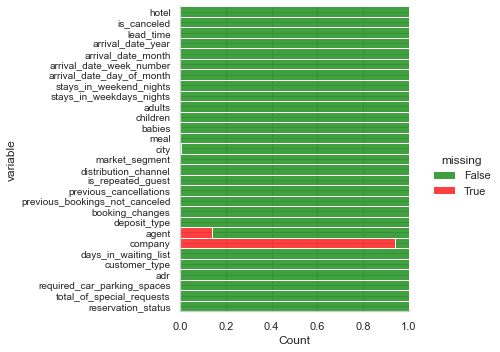

In [12]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data = df.isna().melt(value_name = 'missing'),
    y = 'variable',
    hue = 'missing',
    multiple = 'fill',
    aspect = 1.25,
    palette = ['green', 'red']
)

dms.set_yticklabels(size = 10)

In [13]:
# Filling zero value in company missing values column because no company is involved
df['company'] = df['company'].fillna(0)
# Filling zero value in agent missing values columm because no agent is involved
df['agent'] = df['agent'].fillna(0)
# Filling zero value in children missing values columm because probably customer has no children
df['children'] = df['children'].fillna(0)
# Filling unknown in city missing values columm 
df['city'] = df['city'].fillna('unknown')

**Dataset Observation :**    
- There are several missing values in the columns :
    - `company` with a total of `94% null values`, amounting to `112,593 rows`.
        - Filling zero value in company missing values column since no company is involved.
    - `agent` with a total of `13% null values`, amounting to `16,340 rows`.
        - Filling zero value in agent missing values columm since no agent is involved.
    - `city` with a total of `0,4% null values`, amounting to `488 rows`.
        - Filling unknown in city missing values columm.
    - `children` with a total of `0.003% null values`, amounting to `4 rows`.
        - Filling zero value in children missing values columm, as it is likely that the customers have no children.

In [14]:
#Check missing values after handling
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## **📌 Data Types Information**

In [15]:
print('Data types before handling : \n')
df.info()

Data types before handling : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86129 entries, 0 to 86128
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  m

**Change the some column data type**

Change the data type of `float64` which had null before, `children`, `agent`, and `company` to `int64`.

In [16]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [17]:
print('Data type after handling : \n')
df.info()

Data type after handling : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86129 entries, 0 to 86128
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  mea

## **📌 Handling Invalid Values**

In [18]:
#Check for the unique values in the dataset
for x in df.columns :
    unq = list(df[x].unique())
    unq.sort()
    
    print(f'===== {x} =====')
    if len(unq) >= 13 :
        prt = list(unq[:12])+['-----']
        print(f'{prt}')
    else :
        print(f'{unq}')
    print()

===== hotel =====
['City Hotel', 'Resort Hotel']

===== is_canceled =====
[0, 1]

===== lead_time =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '-----']

===== arrival_date_year =====
[2017, 2018, 2019]

===== arrival_date_month =====
['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

===== arrival_date_week_number =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '-----']

===== arrival_date_day_of_month =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '-----']

===== stays_in_weekend_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, '-----']

===== stays_in_weekdays_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '-----']

===== adults =====
[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, '-----']

===== children =====
[0, 1, 2, 3, 10]

===== babies =====
[0, 1, 2, 9, 10]

===== meal =====
['Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined']

===== city =====
['Kabupaten Aceh Jaya', 'Kabupaten Bandung', 'Kabupa

**Replace incorrect values in meal column**

Data will be replaced with the same meaning for reducing redundancy data.

In [19]:
#Replace the category 'Undefined' with 'No meal' 
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')

In [20]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## **📌 Drop Unnecessary Data**

In the hotel business, one of the aspects to pay attention to is the condition of customer orders. So we need to ensure the total number of guests/customers on each order.

- Number of Guests
- Total duration of the night 

In [21]:
print('===== Before Drop Unnecessary Data =====')
print('Total Data = {} rows'.format(df.shape[0]))

# Number of guests (adults, children, and babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('No Guest = {} rows'.format(df[df['total_guests'] == 0].shape[0]))

# Total duration of the night (weekend/weekdays)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('No Stay Duration = {} rows'.format(df[df['stay_duration'] == 0].shape[0]))

print('===== After Drop Unnecessary Data =====')

# Pick the necessary data
df_final = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)]

print('Total Data = {} rows'.format(df_final.shape[0]))

===== Before Drop Unnecessary Data =====
Total Data = 86129 rows
No Guest = 165 rows
No Stay Duration = 645 rows
===== After Drop Unnecessary Data =====
Total Data = 85378 rows


## **📌 Division by Type of Data**

In [22]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103,0,1,Check-Out,2,2


**List of Column Types :**
- **Categorical** (14 Columns) :
    - `Nominal` : hotel, meal, city, market_segment, distribution_channel, deposit_type, agent, company, customer_type, reservation_status
    - `Nominal (Binary 0 & 1)` : is_canceled, is_repeated_guest
    - `Ordinal` : arrival_date_year, arrival_date_month
    
- **Continuous** (17 Columns) : 
    
    lead_time, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_weekdays_nights, adults, children, babies, previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests, total_guests, stay_duration

In [23]:
cat_cols = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal',
            'city', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'deposit_type', 
            'agent', 'company', 'customer_type', 'reservation_status']

num_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
            'stays_in_weekdays_nights', 'adults', 'children', 'babies',
            'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr',
            'required_car_parking_spaces', 'total_of_special_requests',
            'total_guests', 'stay_duration']

# **⛳ Statistical Summary ⛳**

## **📌 Numerical + Date Features**

In [24]:
print('The number of numerical features is {} columns'.format(len(num_cols)))

n = int(len(num_cols)/2)
df_final[num_cols[:n]].describe(datetime_is_numeric=True).fillna('-').loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

The number of numerical features is 17 columns


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies
count,85378,85378,85378,85378,85378,85378,85378,85378
mean,79.648,26.780,15.809,1.016,2.650,1.883,0.141,0.011
std,85.517,13.652,8.841,1.029,2.040,0.623,0.459,0.115
min,0,1,1,0,0,0,0,0
25%,11,16,8,0,1,2,0,0
50%,49,27,16,1,2,2,0,0
75%,125,37,23,2,4,2,0,0
max,709,53,31,19,50,55,10,10


In [25]:
df_final[num_cols[n:]].describe(datetime_is_numeric=True).fillna('-').loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stay_duration
count,85378,85378,85378,85378,85378,85378,85378,85378,85378
mean,0.031,0.187,0.269,0.645,107.550,0.086,0.707,2.035,3.666
std,0.373,1.750,0.712,9.291,54.522,0.284,0.834,0.793,2.742
min,0,0,0,0,-6.380,0,0,1,1
25%,0,0,0,0,73.007,0,0,2,2
50%,0,0,0,0,99,0,1,2,3
75%,0,0,0,0,135,0,1,2,5
max,26,72,18,391,5400,8,5,55,69


## **📌 Categorical Features**

In [26]:
print('The number of categorical features is {} columns'.format(len(cat_cols)))

The number of categorical features is 14 columns


In [27]:
dfc = df_final.copy()

for i in cat_cols :
    dfc[i] = dfc[i].astype('category')

dfc[cat_cols].describe().transpose()

,count,unique,top,freq
hotel,85378,2,City Hotel,52191
is_canceled,85378,2,0,61681
arrival_date_year,85378,3,2018,41419
arrival_date_month,85378,12,October,11088
meal,85378,4,Breakfast,66532
city,85378,178,Kota Denpasar,26320
market_segment,85378,8,Online TA,51062
distribution_channel,85378,5,TA/TO,67653
is_repeated_guest,85378,2,0,82244
deposit_type,85378,3,No Deposit,84273


In [28]:
for i in cat_cols:
    print(i)
    print(dfc[i].value_counts().iloc[:12])
    print()

hotel
City Hotel      52191
Resort Hotel    33187
Name: hotel, dtype: int64

is_canceled
0    61681
1    23697
Name: is_canceled, dtype: int64

arrival_date_year
2018    41419
2019    31264
2017    12695
Name: arrival_date_year, dtype: int64

arrival_date_month
October      11088
September     9920
July          8184
June          7773
August        7613
May           7362
December      6627
November      6426
April         5967
February      4996
January       4844
March         4578
Name: arrival_date_month, dtype: int64

meal
Breakfast     66532
No Meal        9756
Dinner         8744
Full Board      346
Name: meal, dtype: int64

city
Kota Denpasar                 26320
Kabupaten Bangka              10271
Kota Yogyakarta                8694
Kota Batu                      7142
Kabupaten Bandung              5277
Kabupaten Kepulauan Seribu     3005
Kota Malang                    2989
Kabupaten Magelang             2067
Kota Jakarta Barat             1976
Kabupaten Belitung            

# **💡 Business Insights 💡**

## **📌 Monthly Hotel Booking Analysis Based on Hotel Type**

The role of customer behavior in hotel bookings is very influential or plays an important role in the performance of the hotel business. It is necessary to analyze customer behavior in hotel bookings. This analysis aims to find out which types of hotels are most popular among customers and relate them to seasonal conditions when hotels are booked. From the results of the analysis it can be observed an increase or decrease in hotel bookings in different months or seasons.

In [29]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103,0,1,Check-Out,2,2


In [30]:
df_final['arrival_date_num_month'] = pd.to_datetime(df_final['arrival_date_month'], format='%B').dt.month

In [31]:
df_final['arrival_date_num_month'].unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [32]:
dfg = df_final.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month', 'arrival_date_year'])\
        .agg({'hotel':'count'})\
        .rename(columns = {'hotel' : 'total_booking'})\
        .reset_index()

dfg.sort_values(by = ['hotel', 'arrival_date_num_month', 'arrival_date_year'], inplace = True)
dfg.drop('arrival_date_num_month', axis = 1, inplace = True)
dfg.set_index(['hotel', 'arrival_date_month', 'arrival_date_year'])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                         753
                                2018                        2096
             February           2017                         988
                                2018                        1964
             March              2018                        1004
                                2019                        1670
             April              2018                        1608
                                2019                        1906
             May                2018                        2340
                                2019                        2437
             June               2018                        2376
                                2019                        2641
             July               2018                        2290
                                2019                        3031
             August             2018                        2215
                                2019                        2693
             September          2017                         370
                                2018                        2447
                                2019                        2840
             October            2017                        1051
                                2018                        2774
                                2019                        2648
             November           2017                        1531
                                2018                        2509
             December           2017                        1439
                                2018                        2570
Resort Hotel January            2017                         831
                                2018                        1164
             February           2017                         923
                                2018                        1121
             March              2018                         798
                                2019                        1106
             April              2018                        1124
                                2019                        1329
             May                2018                        1419
                                2019                        1166
             June               2018                        1313
                                2019                        1443
             July               2018                        1374
                                2019                        1489
             August             2018                        1197
                                2019                        1508
             September          2017                        1258
                                2018                        1349
                                2019                        1656
             October            2017                        1329
                                2018                        1585
                                2019                        1701
             November           2017                        1132
                                2018                        1254
             December           2017                        1090
                                2018                        1528

In [33]:
df_book = df_final.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month'])\
                  .agg({'arrival_date_year':['nunique', 'count']})\
                  .reset_index()

df_book.columns = ['hotel_type', 'arrival_month', 'arrival_num_month', 'num_year', 'total_booking']
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
0,City Hotel,April,4,2,3514
1,City Hotel,August,8,2,4908
2,City Hotel,December,12,2,4009
3,City Hotel,February,2,2,2952
4,City Hotel,January,1,2,2849
5,City Hotel,July,7,2,5321
6,City Hotel,June,6,2,5017
7,City Hotel,March,3,2,2674
8,City Hotel,May,5,2,4777
9,City Hotel,November,11,2,4040


From the results of merging the groups above it is found that there are months whose number of years is not the same as the others. Then it needs to be equated for the overall analysis by normalizing the data.

In [34]:
#Check months that have different number of years
df_book[df_book['num_year'] != 2]

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
10,City Hotel,October,10,3,6473
11,City Hotel,September,9,3,5657
22,Resort Hotel,October,10,3,4615
23,Resort Hotel,September,9,3,4263


The results of observational data it was found that for the type of city and resort hotels that have 3 years of data, namely in September and October. The data for the other months only has 2 years of data. So it is necessary to normalize the data by using the average value per year. This step is necessary to be able to analyze and compare the interpretation of trends every month.

In [35]:
df_book['avg_booking'] = round(df_book['total_booking'] / df_book['num_year'])
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
0,City Hotel,April,4,2,3514,1757
1,City Hotel,August,8,2,4908,2454
2,City Hotel,December,12,2,4009,2004
3,City Hotel,February,2,2,2952,1476
4,City Hotel,January,1,2,2849,1424
5,City Hotel,July,7,2,5321,2660
6,City Hotel,June,6,2,5017,2508
7,City Hotel,March,3,2,2674,1337
8,City Hotel,May,5,2,4777,2388
9,City Hotel,November,11,2,4040,2020


In [36]:
df_book.sort_values(by = ['hotel_type', 'arrival_num_month'], inplace = True)
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
4,City Hotel,January,1,2,2849,1424
3,City Hotel,February,2,2,2952,1476
7,City Hotel,March,3,2,2674,1337
0,City Hotel,April,4,2,3514,1757
8,City Hotel,May,5,2,4777,2388
6,City Hotel,June,6,2,5017,2508
5,City Hotel,July,7,2,5321,2660
1,City Hotel,August,8,2,4908,2454
11,City Hotel,September,9,3,5657,1886
10,City Hotel,October,10,3,6473,2158


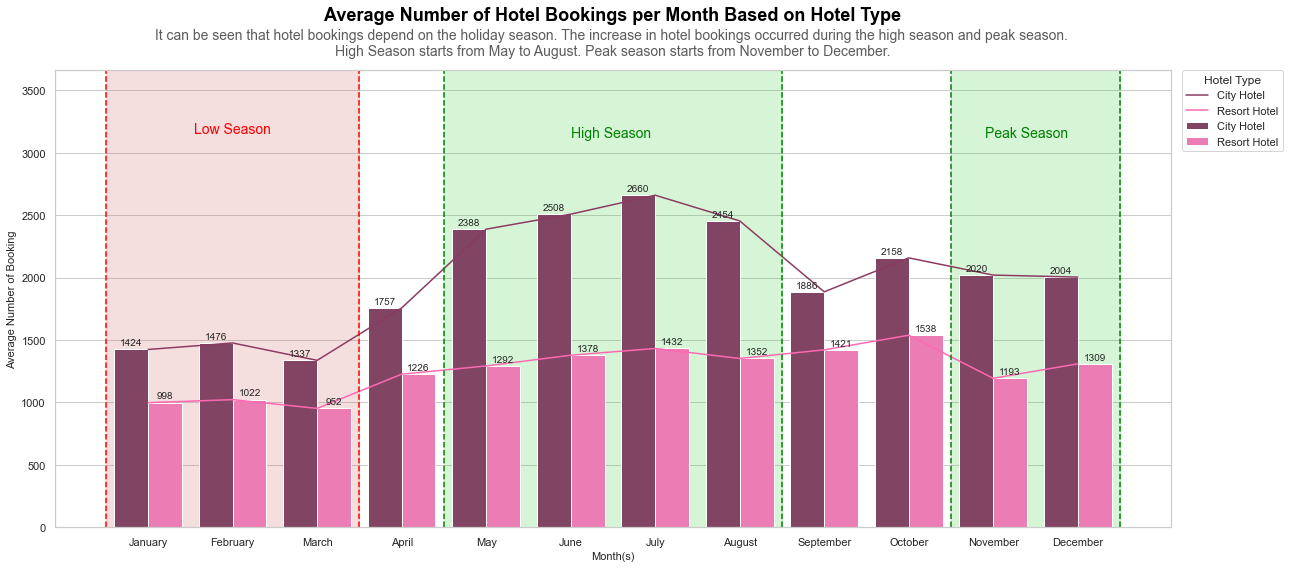

In [37]:
# Set figure & size
fig, ax = plt.subplots(figsize=(18, 8))

color = ['#8B3A62', '#FF69B4']

# Create bar plot and line plot
sns.barplot(x='arrival_month', y ='avg_booking', 
            data=df_book, hue='hotel_type', palette=color)

sns.lineplot(x='arrival_month', y ='avg_booking', 
             data=df_book, hue='hotel_type', palette=color)


# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

# for i, val in enumerate(df_book["hotel_type"].unique()):
#     labels = df_book[df_book["hotel_type"] == val]['percentage'].astype(str) + "%"
#     plt.bar_label(ax.containers[i], labels,
#               label_type='center', color='white', 
#               weight='bold', fontsize=8)

    
# Create area plots for Peak Season and Low Peak Season
max_book = max(df_book['avg_booking'])

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5), max_book+1000, color='indianred', alpha=0.2)
plt.text(x=1, y=max_book+500, s='Low Season', fontsize=14, color='red', ha='center')

plt.axvline(3.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(3.5,8.5), max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=5, y=max_book+500, s='High Season', fontsize=14, color='green', va='center')

plt.axvline(9.5, ls='--', color='green')
plt.axvline(11.5, ls='--', color='green')
plt.stackplot(np.arange(9.5,12.5), max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=9.9, y=max_book+500, s='Peak Season', fontsize=14, color='green', va='center')


# Set title, labels & legend
plt.title("Average Number of Hotel Bookings per Month Based on Hotel Type", 
          fontsize=18, color='black', weight='bold', pad=50)
plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.legend(title="Hotel Type",
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0)

# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """It can be seen that hotel bookings depend on the holiday season. The increase in hotel bookings occurred during the high season and peak season. 
High Season starts from May to August. Peak season starts from November to December.
"""
ax.text((x_start+x_end)/2, y_end*0.95, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)


# Set axis limits
plt.ylim(0, max_book+1000)

# sns.despine() # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

Interpretation:

- Most hotel bookings were in the city hotel type, it can be seen that there has been a significant increase for each season.

- The highest hotel bookings are during high season, because this holiday season coincides with school holidays, long weekends and religious holidays in Indonesia and also coincides with the cold holiday season abroad. In this high season, more promos or booking packages can be made and on the type of hotel to further increase hotel bookings.

- Hotel bookings also experience an increase during peak season, but it occurs more briefly compared to high season. At the end of the year there are usually lots of holidays and various celebrations until the turn of the year arrives. Can implement New Year promotions to attract more visitors.

- The lowest hotel bookings occur during low season, because during this time people are busy with activities not on vacation. During the low season, hotels may offer discounts or vouchers to entice customers to continue visiting the establishment.

## **📌 Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

In analyzing customer behavior in hotel bookings, one of the hotel's success metrics that can be measured is the cancellation rate of hotel reservations. If many customers cancel their reservations, it will have a negative effect on hotel performance. So it needs to be explored what are the factors that cause customers to cancel their reservations. At this stage an investigation will be carried out on how the length duration of stay will affect the hotel booking cancellation rate.

In [38]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,arrival_date_num_month
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1,9
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1,9
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2,9
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2,9
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103,0,1,Check-Out,2,2,9


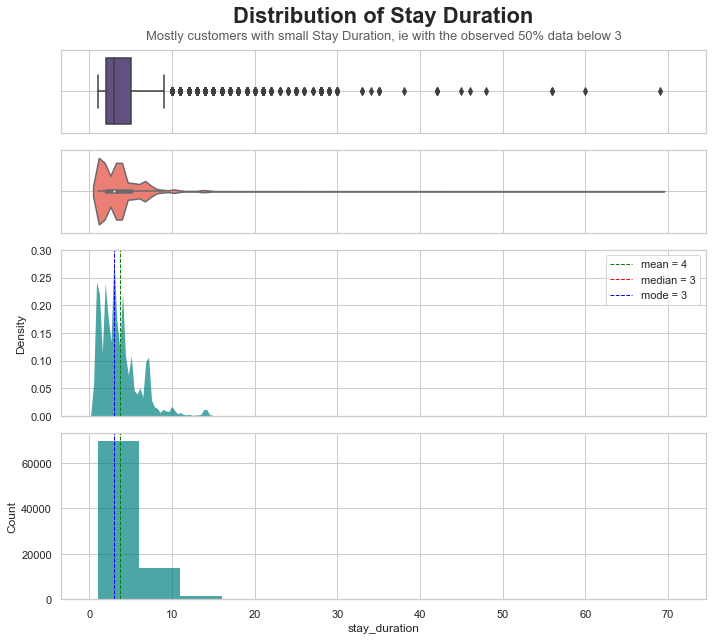

In [39]:
#Check the distribution of data from stay duration
fig, ax = plt.subplots(nrows=4, ncols=1,
                       figsize=(10, 9), sharex=True,
                       gridspec_kw={'height_ratios': [3,3,6,6]})

total_charges = df_final['stay_duration'].dropna(axis=0)

b = sns.boxplot(x=total_charges, ax=ax[0], color = '#5F488B')

v = sns.violinplot(x=total_charges, ax=ax[1], color = '#FF6F61')

k = sns.kdeplot(x=total_charges, ax=ax[2], color = '#008080', fill=True,
               alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color = '#008080', fill=True,
               alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
        k.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
        h.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
        
#adding horizontal grid lines and format label
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)
    
b.set_title('Distribution of Stay Duration',
            fontsize=22, fontweight='bold', pad=27)

#set info 
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = 'Mostly customers with small Stay Duration, ie with the observed 50% data below 3'
b.text((x_start+x_end)/2, y_end*1.25, desc, 
        ha = 'center', fontsize = 13, alpha = 0.75)

k.set_xlabel('Stay Duration')
k.legend()
plt.tight_layout()
plt.show()

Based on the data distribution, it appears to be positively skewed or right-skewed. To facilitate data categorization, grouping will be applied. Data points greater than 21 will be combined into a single category.

In [40]:
#Get stay duration group
def set_staydur_group(x):
    if x['stay_duration'] <= 7:
        return '<= 1 Week'
    elif x['stay_duration'] <= 14:
        return '2 Weeks'
    elif x['stay_duration'] <= 21:
        return '3 Weeks'
    return '>= 4 Weeks'

df_final['stay_duration_group'] = df_final.apply(lambda x: set_staydur_group(x), axis = 1)
df_final['stay_duration_group'].unique()

array(['<= 1 Week', '2 Weeks', '3 Weeks', '>= 4 Weeks'], dtype=object)

In [41]:
df_final['stay_duration_group'].value_counts()

<= 1 Week     80560
2 Weeks        4459
3 Weeks         234
>= 4 Weeks      125
Name: stay_duration_group, dtype: int64

In [42]:
df_cancel = df_final.groupby(['hotel', 'stay_duration_group', 'is_canceled'])\
                    .agg({'hotel':'count'})\
                    .rename(columns={'hotel':'num_booking'})\
                    .reset_index()

df_tot_cancel = df_cancel.groupby(['hotel', 'stay_duration_group'])\
                         .agg({'num_booking':'sum'})\
                         .rename(columns={'num_booking':'total_booking'})\
                         .reset_index()

df_cancel = df_cancel.merge(df_tot_cancel, on=['hotel', 'stay_duration_group'])

df_cancel['cancellation_ratio'] = round((df_cancel['num_booking']/df_cancel['total_booking'])*100, 2)

sorter = ["<= 1 Week", "2 Weeks", "3 Weeks", ">= 4 Weeks"]
df_cancel["stay_duration_group"] = pd.Categorical(df_cancel["stay_duration_group"], 
                                          categories=sorter, 
                                          ordered=True)

df_cancel.sort_values("stay_duration_group", inplace=True)
df_cancel.reset_index(drop=True, inplace=True)

df_cancel

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Week,0,35845,51037,70.230
1,City Hotel,<= 1 Week,1,15192,51037,29.770
2,Resort Hotel,<= 1 Week,0,22665,29523,76.770
3,Resort Hotel,<= 1 Week,1,6858,29523,23.230
4,City Hotel,2 Weeks,0,486,1009,48.170
5,City Hotel,2 Weeks,1,523,1009,51.830
6,Resort Hotel,2 Weeks,0,2511,3450,72.780
7,Resort Hotel,2 Weeks,1,939,3450,27.220
8,City Hotel,3 Weeks,0,27,100,27
9,City Hotel,3 Weeks,1,73,100,73


This stage will observe data on canceled bookings, especially focusing on the cancellation rate for each type of hotel

In [43]:
#Filtering pick the data whose hotel bookings were canceled
df_cancel_final = df_cancel[df_cancel['is_canceled']==1]
df_cancel_final

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
1,City Hotel,<= 1 Week,1,15192,51037,29.770
3,Resort Hotel,<= 1 Week,1,6858,29523,23.230
5,City Hotel,2 Weeks,1,523,1009,51.830
7,Resort Hotel,2 Weeks,1,939,3450,27.220
9,City Hotel,3 Weeks,1,73,100,73
11,Resort Hotel,3 Weeks,1,47,134,35.070
13,City Hotel,>= 4 Weeks,1,39,45,86.670
15,Resort Hotel,>= 4 Weeks,1,26,80,32.500


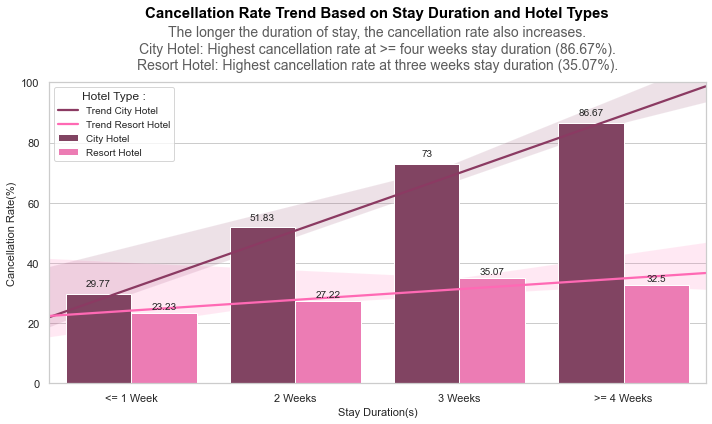

In [44]:
# Set figure & size
fig, ax = plt.subplots(figsize=(10, 6))

color = ['#8B3A62', '#FF69B4']
city_hotel = df_cancel_final[df_cancel_final['hotel'] == 'City Hotel']
resort_hotel = df_cancel_final[df_cancel_final['hotel'] == 'Resort Hotel']

# Create bar plot and regression plot
sns.barplot(x='stay_duration_group', y='cancellation_ratio', 
            data=df_cancel_final, hue='hotel', palette=color)

sns.regplot(x=np.arange(0, len(city_hotel)), y='cancellation_ratio', 
            data=city_hotel, scatter=False, color=color[0],
            label = 'Trend City Hotel', truncate=False)

sns.regplot(x=np.arange(0, len(resort_hotel)), y='cancellation_ratio', 
            data=resort_hotel, scatter=False, color=color[1], 
            label='Trend Resort Hotel', truncate=False)

# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Stay Duration and Hotel Types", 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})


# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """The longer the duration of stay, the cancellation rate also increases.
City Hotel: Highest cancellation rate at >= four weeks stay duration (86.67%).
Resort Hotel: Highest cancellation rate at three weeks stay duration (35.07%)."""
ax.text((x_start+x_end)/2, y_end*0.93, desc,
        ha = 'center', fontsize = 14,  alpha = 0.75)

# Set axis limits
plt.ylim(0, 100)

# sns.despine() # # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

Interpretation :

- The highest number of cancellation ratios was for city hotel types, with a significant increase. Resort hotel types also experienced an increase in the cancellation ratio but not too significant due to a decrease in stays of more than 4 weeks.

- The duration of stay and the cancellation rate has a positive correlation, which shows that the longer the duration of the stay, the higher the cancellation rate.

- Observation results show that the highest cancellation rate is in city hotel types for stays of more than 4 weeks. The resort hotel type has the highest cancellation rate for a 3-week stay.

- To solve this problem, hotel companies can pay more attention to the reasons for canceling bookings and implement a more stringent cancellation policy. Additionally, offering special promotions may be effective in reducing cancellations.

## **📌 Impact Analysis of Lead Time on Hotel Bookings Cancellation Rates**

The objective of business insight in this analysis is to see the correlation between the lead time for hotel bookings and the rate of cancellation of hotel bookings. In the hotel industry, customers usually book hotels in advance of their arrival, and these lead times usually vary from a few days to several months. The aim is to see whether the lead time between hotel bookings and arrival times will affect the cancellation of hotel bookings.

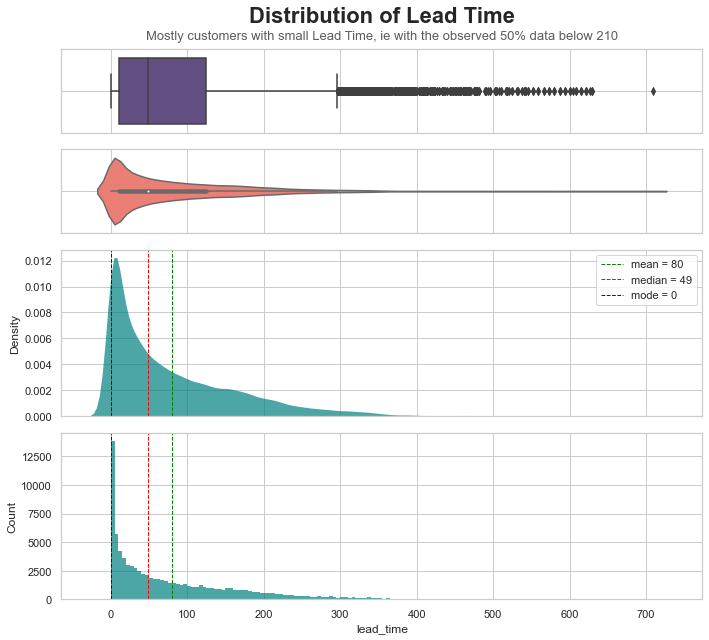

In [45]:
#Check the distribution of data from lead time
fig, ax = plt.subplots(nrows=4, ncols=1,
                       figsize=(10, 9), sharex=True,
                       gridspec_kw={'height_ratios': [3,3,6,6]})

total_charges = df_final['lead_time'].dropna(axis=0)

b = sns.boxplot(x=total_charges, ax=ax[0], color = '#5F488B')

v = sns.violinplot(x=total_charges, ax=ax[1], color = '#FF6F61')

k = sns.kdeplot(x=total_charges, ax=ax[2], color = '#008080', fill=True,
               alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color = '#008080', fill=True,
               alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
        k.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
        h.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
        
#adding horizontal grid lines and format label
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)
    
b.set_title('Distribution of Lead Time',
            fontsize=22, fontweight='bold', pad=27)

#set info 
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = 'Mostly customers with small Lead Time, ie with the observed 50% data below 210'
b.text((x_start+x_end)/2, y_end*1.25, desc, 
        ha = 'center', fontsize = 13, alpha = 0.75)

k.set_xlabel('Lead Time')
k.legend()
plt.tight_layout()
plt.show()

In [46]:
#Get lead time in group
def set_leadtime_group(x):
    if x['lead_time'] <= 30:
        return '<= 1 Month'
    elif x['lead_time'] <= 120:
        return '2 - 4 Months'
    elif x['lead_time'] <= 210:
        return '5 - 7 Months'
    elif x['lead_time'] <= 300:
        return '8 - 10 Months'
    elif x['lead_time'] <= 360:
        return '11 - 12 Months'
    return '> 12 Months'

df_final['lead_time_group'] = df_final.apply(lambda x: set_leadtime_group(x), axis = 1)
df_final['lead_time_group'].unique()

array(['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '> 12 Months',
       '11 - 12 Months', '8 - 10 Months'], dtype=object)

In [47]:
df_final['lead_time_group'].value_counts()

<= 1 Month        33810
2 - 4 Months      29379
5 - 7 Months      14484
8 - 10 Months      5532
11 - 12 Months     1558
> 12 Months         615
Name: lead_time_group, dtype: int64

In [48]:
df_cancel2 = df_final.groupby(['hotel', 'lead_time_group', 'is_canceled'])\
                    .agg({'hotel':'count'})\
                    .rename(columns={'hotel':'num_booking'})\
                    .reset_index()

df_tot_cancel2 = df_cancel2.groupby(['hotel', 'lead_time_group'])\
                         .agg({'num_booking':'sum'})\
                         .rename(columns={'num_booking':'total_booking'})\
                         .reset_index()

df_cancel2 = df_cancel2.merge(df_tot_cancel2, on=['hotel', 'lead_time_group'])

df_cancel2['cancellation_ratio'] = round((df_cancel2['num_booking']/df_cancel2['total_booking'])*100, 2)

sorter = ['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']
df_cancel2["lead_time_group"] = pd.Categorical(df_cancel2["lead_time_group"], 
                                          categories=sorter, 
                                          ordered=True)

df_cancel2.sort_values("lead_time_group", inplace=True)
df_cancel2.reset_index(drop=True, inplace=True)

df_cancel2

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Month,1,3927,19951,19.680
1,City Hotel,<= 1 Month,0,16024,19951,80.320
2,Resort Hotel,<= 1 Month,1,1690,13859,12.190
3,Resort Hotel,<= 1 Month,0,12169,13859,87.810
4,City Hotel,2 - 4 Months,0,12918,19574,66
5,City Hotel,2 - 4 Months,1,6656,19574,34
6,Resort Hotel,2 - 4 Months,1,3018,9805,30.780
7,Resort Hotel,2 - 4 Months,0,6787,9805,69.220
8,Resort Hotel,5 - 7 Months,1,1851,5763,32.120
9,City Hotel,5 - 7 Months,0,5402,8721,61.940


This stage will observe data on canceled bookings, especially focusing on the cancellation rate for each type of hotel

In [49]:
#Filtering pick the data whose hotel bookings were canceled
df_cancel_final2 = df_cancel2[df_cancel2['is_canceled']==1]
df_cancel_final2

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Month,1,3927,19951,19.680
2,Resort Hotel,<= 1 Month,1,1690,13859,12.190
5,City Hotel,2 - 4 Months,1,6656,19574,34
6,Resort Hotel,2 - 4 Months,1,3018,9805,30.780
8,Resort Hotel,5 - 7 Months,1,1851,5763,32.120
10,City Hotel,5 - 7 Months,1,3319,8721,38.060
12,Resort Hotel,8 - 10 Months,1,898,2662,33.730
14,City Hotel,8 - 10 Months,1,1309,2870,45.610
16,Resort Hotel,11 - 12 Months,1,370,854,43.330
17,City Hotel,11 - 12 Months,1,417,704,59.230


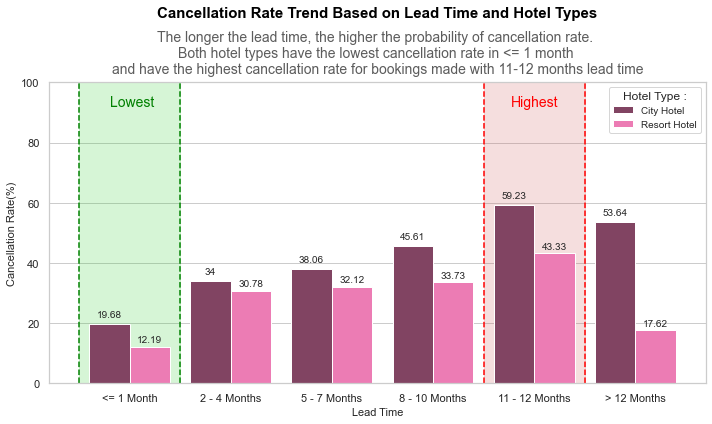

In [50]:
# Set figure & size
fig, ax = plt.subplots(figsize=(10, 6))

color = ['#8B3A62', '#FF69B4']
sorter = ['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']
city_hotel = df_cancel_final2[df_cancel_final2['hotel'] == 'City Hotel']
resort_hotel = df_cancel_final2[df_cancel_final2['hotel'] == 'Resort Hotel']

# Create bar plot and line plot
sns.barplot(x='lead_time_group', y='cancellation_ratio', 
            data=df_cancel_final2, hue='hotel', palette=color,
            order=sorter)

# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)


# Create area plots for Peak Season and Low Peak Season
plt.axvline(-0.5, ls='--', color='green')
plt.axvline(0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), 100, color='limegreen', alpha=0.2)
plt.text(x=0.03, y=92, s='Lowest', fontsize=14, color='green', ha='center')

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), 100, color='indianred', alpha=0.2)
plt.text(x=4, y=92, s='Highest', fontsize=14, color='red', ha='center')


# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Lead Time and Hotel Types", 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Lead Time', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})


# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """The longer the lead time, the higher the probability of cancellation rate. 
Both hotel types have the lowest cancellation rate in <= 1 month 
and have the highest cancellation rate for bookings made with 11-12 months lead time"""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center', fontsize = 14,  alpha = 0.75)

# Set axis limits
plt.ylim(0, 100)

# sns.despine() # # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

Interpretation :

- The longer the lead time, the higher the cancellation rate for both types of hotels. However, there was a non-significant decrease in the order cancellation ratio for lead times of more than 12 months.

- The lowest cancellation rate for bookings with a lead time of less than 1 month for both types of hotels. In the city hotel type it is 19.68% and the resort hotel type is 12.19%.

- The highest cancellation rate for bookings with a lead time range of 11 to 12 months for both types of hotels. In the city hotel type it is 59.23% and the resort hotel type is 43.33%.

- Cancellation rates occur for city and resort hotel type bookings with a lead time of around 1 year. This can happen because it takes too long for the customer to stay at the hotel from the time of the reservations. Many factors can occur, such as customers who forget their orders, changes in customer vacation time, and others. To overcome this problem, the hotel can periodically remind customers of reservations and set an reservations cancellation policy related to lead time.

## **✨ Summary**
- The two hotels showed a similar trend of increasing bookings, with City Hotel experiencing the highest bookings. Hotel bookings increase significantly during peak holidays and high season, especially in May - August and November - December. Hotel bookings decrease during the low season, namely in January - April which is not a holiday period in Indonesia. To increase bookings during low season, hotels need to plan strategies such as being able to apply promotions and discounts for both types of hotels.

- City hotel type has the highest cancellation rate with a significant increasing trend. There is a positive correlation between Duration of Stay and Cancellation Rate for both hotels. The longer the duration of the stay, the higher the booking cancellation rate. The highest cancellation rate for City Hotels is for stays of more than 4 weeks, while the highest rates for Resort Hotels are for stays of 3 weeks. Hotels can adopt stricter cancellation policies and offer special promotions related to stays duration that can help reduce cancellation rates.

- Longer lead times are associated with higher cancellation rates for City Hotels and Resorts. The lowest cancellation rate was observed for a lead time of <= 1 month, while the highest rate occurred for a lead time of 11-12 months. Both Resort and City Hotels experienced the highest cancellation rates of around 1 year lead time. Hotels can implement regular booking reminders and a strict cancellation policy on lead times that can help reduce cancellation rates and improve overall booking efficiency.